<a href="https://colab.research.google.com/github/yicjiang/H-and-M2/blob/main/Assignment3_Yicheng_Jiang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BA780 Assignment3 - Yicheng (Victor) Jiang 

## Data Preperation Stage

#### 1. Import data from GitHub and preview the information

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
heart_study = pd.read_csv('https://raw.githubusercontent.com/soltaniehha/Intro-to-Data-Analytics/main/data/AnalyticsEdge-Datasets/Framingham.csv')

####2. Data descriptions

| Column Name | Description | Conversion|
|-------------|:------------|:------------|
|male| Sex of patient | No(0), Yes(1)|
|Gender| Sex of patient created base on **male** column | 0 (Female), 1 (Male)|
|age| Age in years at first examination|
|education | Educational levels | Some high school (1), high school/GED (2), some college/vocational school (3), college (4) |
| currentSmoker| Currently Smoke | No(0), Yes(1)|
| cigsPerDay | Number of cigarettes consumed each day |
| BPmeds | On blood pressure medication at time of first examination |  No(0), Yes(1) |
| prevalentStroke | Previously had a stroke | No(0), Yes(1)|
| prevalentHyp | Currently hypertensive | No(0), Yes(1)|
| diabetes | Currently has diabetes | No(0), Yes(1)|
|totChol| Total cholesterol (mg/dL) |
|sysBP | Systolic blood pressure |
|diaBP | Diastolic blood pressure |
|BMI | Body Mass Index, weight (kg)/height (m)2 |
|heartRate | Heart rate (beats/minute) |
|glucose | Blood glucose level (mg/dL) |
|TenYearCHD|Whether or not a patient experienced CHD within 10 years of first examination|No(0), Yes(1) |



1.  There are 4240 rows/records and 16 columns in heart_studay data frame. Based on this observation and the output given by the info function, following columns contain the missing values: 

     **education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose**

In [3]:
heart_study.shape

(4240, 16)

In [4]:
heart_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
heart_study.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


2. Check the data quality by exam the maximum values and minium values. All categorical values return results meet the expection as the conversion table and there are no negative values in each column.

In [6]:
heart_study.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### 3. Data Validation Check (Validation & Null Check)

* In order to ensure that all null values are dropped or replaced in the data frame, the **isnull** sytnex is performed.  

1. Check if there are any duplicated records in the dataset. As the result, there are no duplicates.

In [7]:
## There is no duplicated rows
heart_study[heart_study.duplicated()].shape[0]

0

2. In numeric variable columns - **age, cigsPerDay, totChol, BMI, sysBP, diaBP, heartRate, and glucose**. 

  There are **0 null** in age column, **29 nulls** in cigsPerDay column, **50 nulls** in totChol column, **19 nulls** in BMI column, **1 null** in heartRate column, and **388 nulls** in glucose column.

In [8]:
cigsPerDay_null = heart_study[heart_study['cigsPerDay'].isnull()].shape[0]
totChol_null = heart_study[heart_study['totChol'].isnull()].shape[0]
BMI_null = heart_study[heart_study['BMI'].isnull()].shape[0]
heartRate_null = heart_study[heart_study['heartRate'].isnull()].shape[0]
glucose_null = heart_study[heart_study['glucose'].isnull()].shape[0]
age_null = heart_study[heart_study['age'].isnull()].shape[0]

In [9]:
print("There are " + str(age_null) + " null in age column," + str(cigsPerDay_null) + " nulls in cigsPerDay column, " + str(totChol_null) + 
      " nulls in totChol column, " + str(BMI_null) + " nulls in BMI column, "+str(heartRate_null) + 
      " nulls in heartRate column, and " + str(glucose_null) + " nulls in glucose column.")

There are 0 null in age column,29 nulls in cigsPerDay column, 50 nulls in totChol column, 19 nulls in BMI column, 1 nulls in heartRate column, and 388 nulls in glucose column.


3. Filling the null in these numerical variables by median, because median will not impact by any outliers.

In [10]:
heart_study[['cigsPerDay','totChol','BMI','heartRate','glucose']] = heart_study[['cigsPerDay','totChol','BMI','heartRate','glucose']] \
.fillna(heart_study[['cigsPerDay','totChol','BMI','heartRate','glucose']].median())

4. In categorical variable columns - **Male, education, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes, and TenYearCHD**. 

   There are 0 null in male column,0 nulls in age column, **105 nulls in education column**, 0 nulls in currentSmoker column, **53 nulls in BPMeds column**, 0 nulls in prevalentStroke column, 0 nulls in prevalentHyp column, 0 nulls in diabetes column, and 0 in TenYearCHD column.


In [11]:
male_null = heart_study[heart_study['male'].isnull()].shape[0]
age_null = heart_study[heart_study['age'].isnull()].shape[0]
education_null = heart_study[heart_study['education'].isnull()].shape[0]
currentSmoker_null = heart_study[heart_study['currentSmoker'].isnull()].shape[0]
BPMeds_null = heart_study[heart_study['BPMeds'].isnull()].shape[0]
prevalentStroke_null = heart_study[heart_study['prevalentStroke'].isnull()].shape[0]
prevalentHyp_null = heart_study[heart_study['prevalentHyp'].isnull()].shape[0]
diabetes_null = heart_study[heart_study['diabetes'].isnull()].shape[0]
TenYearCHD_null = heart_study[heart_study['TenYearCHD'].isnull()].shape[0]

In [12]:
print("There are " + str(male_null) + " null in male column," + str(age_null) + " nulls in age column, " + str(education_null) + 
      " nulls in education column, " + str(currentSmoker_null) + " nulls in currentSmoker column, "+str(BPMeds_null) + 
      " nulls in BPMeds column, " + str(prevalentStroke_null) + " nulls in prevalentStroke column, " + str(prevalentHyp_null) + 
      " nulls in prevalentHyp column, " + str(diabetes_null) + " nulls in diabetes column, and " + str(TenYearCHD_null) + " in TenYearCHD column.")

There are 0 null in male column,0 nulls in age column, 105 nulls in education column, 0 nulls in currentSmoker column, 53 nulls in BPMeds column, 0 nulls in prevalentStroke column, 0 nulls in prevalentHyp column, 0 nulls in diabetes column, and 0 in TenYearCHD column.


5. Base on common sense the education level has little impact on the target variable - TenYearCHD. (Which will be shown in analysis later). Dropping those rows with missing value in education level can impact overall analysis. Since there there are 1720 value in 1, which dominate 40.6% of educational level, mode used to replace nulls. Also, mode is performed to fill nulls in BPMeds column.

In [13]:
mode = heart_study['education'].mode()
print(mode)

0    1.0
dtype: float64


In [14]:
heart_study[heart_study['education'] == 1].shape[0] / heart_study.shape[0]

0.4056603773584906

In [15]:
heart_study['education'] = heart_study['education'].fillna(heart_study['education'].mode()[0])

In [16]:
heart_study['BPMeds'] = heart_study['BPMeds'].fillna(heart_study['BPMeds'].mode()[0])

6. Now the null issue is being fixed.

In [17]:
heart_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


6. Data Validation check for currentSmoker and cigsPerDay columns. For those who currentSmoker is 1 then the cigsPerDay cannot be 0. Else for those who currentSmoker is 0 then the cigsPerDay has to be 0.

In [18]:
print(heart_study[heart_study['currentSmoker'] == 1].shape[0])
print(heart_study[heart_study['currentSmoker'] == 0].shape[0])

2095
2145


**Step1:** Filtering out currentSmoker is True **(currentSmoker = 1)**, but **has null value or value equals to 0** in the column of cigsPerDay. As the result 29 rows being droped.



As the result, 29 rows with currentSmoker is 1 but has invalid data in cigsPerDay dropped

In [19]:
## Create the filter to drop invalid data
drop_filtering =  ((heart_study['currentSmoker'] == 1) & (heart_study['cigsPerDay'] == 0))

In [20]:
heart_study[drop_filtering].head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,0.0,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,78.0,0
139,1,49,4.0,1,0.0,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,0.0,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0


In [21]:
index = heart_study.loc[drop_filtering,:].index

In [22]:
heart_study = heart_study.drop(index,axis = 0)

In [23]:
## drop check
drop_filtering =  ((heart_study['currentSmoker'] == 1) & (heart_study['cigsPerDay'] == 0))
heart_study[drop_filtering].shape[0]

0

**Step2:** Filtering out currentSmoker is False (currentSmoker = 1). If there are any value equal to 0 in cigsPerDay column, then drop out these rows. There are no such records.



In [24]:
## Create the filter to drop invalid data
drop_filtering2 =  ((heart_study['currentSmoker'] == 0) & (heart_study['cigsPerDay'] != 0))
heart_study[drop_filtering2].head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


7. Run data description after cleaning

In [25]:
heart_study.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4211 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4211 non-null   int64  
 1   age              4211 non-null   int64  
 2   education        4211 non-null   float64
 3   currentSmoker    4211 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4211 non-null   float64
 6   prevalentStroke  4211 non-null   int64  
 7   prevalentHyp     4211 non-null   int64  
 8   diabetes         4211 non-null   int64  
 9   totChol          4211 non-null   float64
 10  sysBP            4211 non-null   float64
 11  diaBP            4211 non-null   float64
 12  BMI              4211 non-null   float64
 13  heartRate        4211 non-null   float64
 14  glucose          4211 non-null   float64
 15  TenYearCHD       4211 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 559.3 KB


## High-level aggregation and Visualization

1. From the Correlation Matrix Heatmap, the correlation between the target variable - TenYearCHD in either No(0) Yes(1) - and independent variables is observed. Throughout the visulation, following top 5 variables have strong correlation with **TenYearCHD**:
  
  **age | prevalentHyp | sysBP | diaBP | glucose**

Text(0.5, 1.0, 'Correlation Matrix')

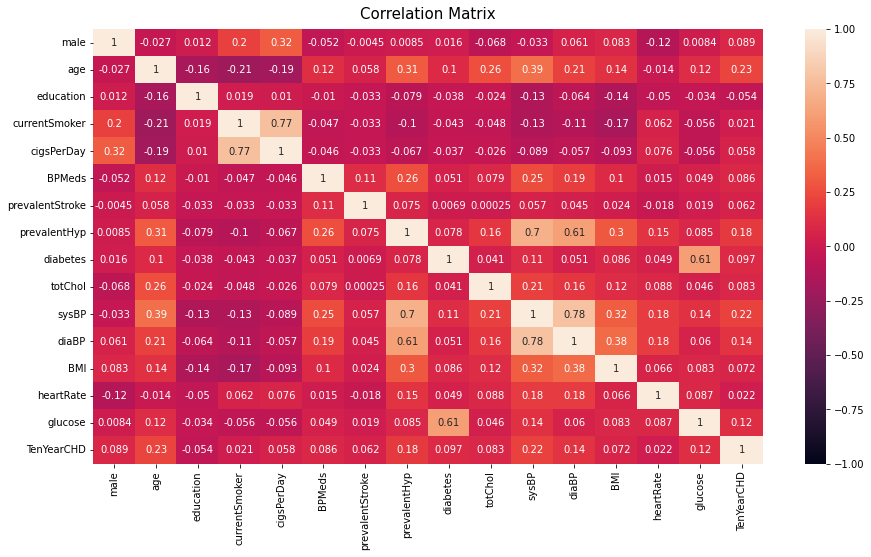

In [26]:
heart_study_corr = heart_study.corr()
plt.figure(figsize=(15, 8 ))
heatmap = sns.heatmap(heart_study_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':15}, pad=10)

2. How many people has TenYearCHD (10-year risk of coronary heart disease)?

  There are 642 people in the whole dataset have 10-year risk of coronary heart disease. And there are 3569 sample population are not having 10-year risk of coronary heart disease. Furthermore, **300 males and 342 females** having ten year CHD.

In [27]:
heart_study[heart_study['TenYearCHD'] == 1].shape[0]

642

In [28]:
heart_study[heart_study['TenYearCHD'] == 0].shape[0]

3569

In [29]:
male_hasTenYearCHD = heart_study[(heart_study['TenYearCHD'] == 1) & (heart_study['male'] == 0)].shape[0]
female_hasTenYearCHD = heart_study[(heart_study['TenYearCHD'] == 1) & (heart_study['male'] == 1)].shape[0]

print(male_hasTenYearCHD)
print(female_hasTenYearCHD)

300
342


Text(0.5, 0.98, 'Count TenYearCHD by Gender')

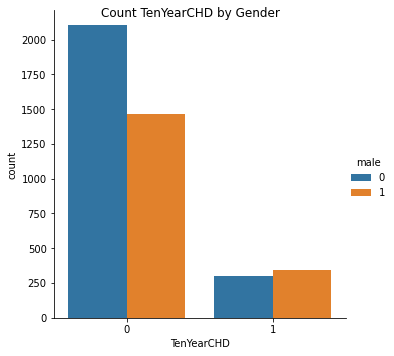

In [30]:
fig2 = sns.catplot(x="TenYearCHD", kind="count", hue='male', data=heart_study)
fig2.fig.suptitle('Count TenYearCHD by Gender')

3. Base on the correlation martix, AGE, and diaBP observed as top 3 major numerical values impact to the target variable TenYearCHD. Average age for people who having TenYearCHD is 54.16, and average age for people who not having TenYearCHD is 48.76. Average diaBP for people who having TenYearCHD is 82.16, and for people who do not having TenYearCHD is 86.95. Average glucose for people who having TenYearCHD is 80.39 and for people who do not having TenYearCHD is 88.19.

In [31]:
heart_study.pivot_table(heart_study[['diaBP','age','glucose','sysBP','BMI','heartRate','totChol','cigsPerDay']],index="TenYearCHD",aggfunc=[np.median])

median                                                      
              BMI age cigsPerDay diaBP glucose heartRate  sysBP totChol
TenYearCHD                                                             
0           25.26  48        0.0  81.0    78.0      75.0  127.0   233.0
1           26.09  55        2.5  85.5    78.0      75.0  139.0   240.5

In [32]:
heart_study.pivot_table(heart_study[['diaBP','age','glucose','sysBP','BMI','heartRate','totChol','cigsPerDay']],index="TenYearCHD",aggfunc=[np.mean])

mean                                                         \
                  BMI        age cigsPerDay      diaBP    glucose  heartRate   
TenYearCHD                                                                     
0           25.674405  48.757915   8.713925  82.160829  80.393668  75.751751   
1           26.489439  54.161994  10.629283  86.952492  88.186916  76.496885   

                                    
                 sysBP     totChol  
TenYearCHD                          
0           130.330345  235.062763  
1           143.599688  245.261682

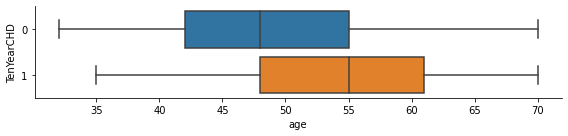

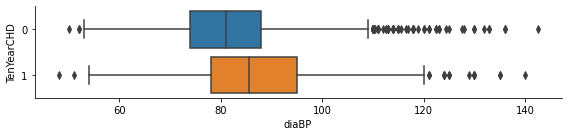

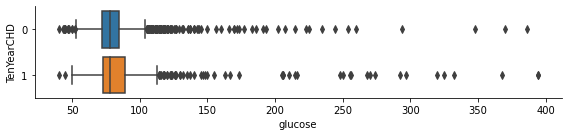

In [33]:
sns.catplot(y="TenYearCHD", x="age", 
                 kind="box", data=heart_study, height=2, aspect=4, orient='h')

sns.catplot(y="TenYearCHD", x="diaBP", 
                 kind="box", data=heart_study, height=2, aspect=4, orient='h')

sns.catplot(y="TenYearCHD", x="glucose", 
                 kind="box", data=heart_study, height=2, aspect=4, orient='h')

4. In order to further investigate how currentSmoker effect the results of TenYearCHD, since we observed that the mode for people who having TenYearCHD has mode of currentSmoker 1. Male smoker who having Ten Year CHD smokes 14.98 cigsPerDay, for female smoker who having Ten Year CHD smokes 5.67 cigsPerDay.

In [34]:
heart_study.pivot_table(heart_study[['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']],index="TenYearCHD",aggfunc=[pd.Series.mode])

mode                                                     \
           BPMeds currentSmoker diabetes education male prevalentHyp   
TenYearCHD                                                             
0             0.0             0        0       1.0    0            0   
1             0.0             1        0       1.0    1            1   

                            
           prevalentStroke  
TenYearCHD                  
0                        0  
1                        0

In [35]:
heart_study.pivot_table(heart_study[['cigsPerDay','BMI','glucose','heartRate','totChol']],index=heart_study[["TenYearCHD","male"]],aggfunc=[np.mean])

mean                                             
                       BMI cigsPerDay    glucose  heartRate     totChol
TenYearCHD male                                                        
0          0     25.350637   5.737767  80.451306  77.016627  237.454632
           1     26.139932  12.993169  80.310792  73.933060  231.623634
1          0     26.608100   5.673333  88.183333  77.496667  251.603333
           1     26.385351  14.976608  88.190058  75.619883  239.698830

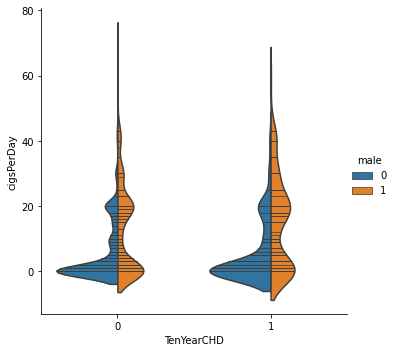

In [36]:
sns.catplot(x="TenYearCHD", y="cigsPerDay", hue="male", kind="violin", split=True, inner="stick", data=heart_study);

5. According to the correlation matrix, there is a strong relationship between the categorical variable -  prevalentStroke - and result - TenYearCHD. According to the following observation, majority females having TenYearCHD also having prevalentHyp.

In [37]:
heart_study.pivot_table(heart_study[['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']],index=heart_study[["TenYearCHD","male"]],aggfunc=[pd.Series.mode])

mode                                                \
                BPMeds currentSmoker diabetes education prevalentHyp   
TenYearCHD male                                                        
0          0       0.0             0        0       1.0            0   
           1       0.0             1        0       1.0            0   
1          0       0.0             0        0       1.0            1   
           1       0.0             1        0       1.0            0   

                                 
                prevalentStroke  
TenYearCHD male                  
0          0                  0  
           1                  0  
1          0                  0  
           1                  0

6. Even though in the correlation martix, there is a strong colleration between the diaBP and age. However, the obseration throughout the scatterplot is not obvious. The scatterplot shows people who having high diaBP are equally distributed across various ages.

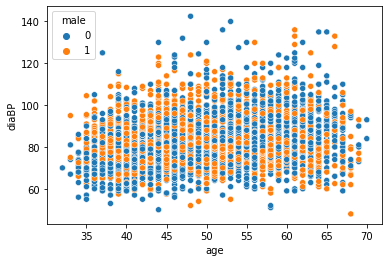

In [38]:
sns.scatterplot(x="age", y="diaBP", data=heart_study, hue='male' );